### Import necessary libraries

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [47]:
class ImageProcessor:
    def __init__(self):
        pass

    def create_image(self):
        
#         Creates an image with 2 objects and a background.
        
        img = np.zeros((100, 100), dtype=np.uint8)
        img[10:40, 10:40] = 1
        img[50:95, 50:95] = 2
        return img

    def add_noise(self, img):
        
#         Adds Gaussian noise to the given image.
      
        noise = np.random.normal(0, 0.1, img.shape)
        img_noise = img.astype(np.float32) + noise
        img_noise = np.clip(img_noise, 0, 2).astype(np.uint8)
        return img_noise

    def apply_otsus_algorithm(self, img):
        
#         Applies Otsu's thresholding algorithm to the given image.
        
        
        _, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        return thresh

    def display_images(self, images, titles):
        
#         Displays the given images with their corresponding titles.
        
        fig, axs = plt.subplots(1, len(images), figsize=(10, 5))
        for i, img in enumerate(images):
            axs[i].imshow(img, cmap='gray')
            axs[i].set_title(titles[i])
        plt.show()




In [48]:
img_processor = ImageProcessor()

In [49]:
original_img = img_processor.create_image()

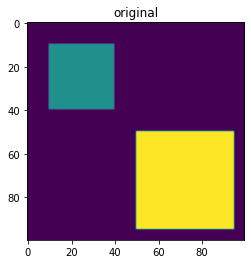

In [66]:
plt.imshow(original_img)
plt.title("original")
plt.show()

In [50]:
noisy_img = img_processor.add_noise(original_img)

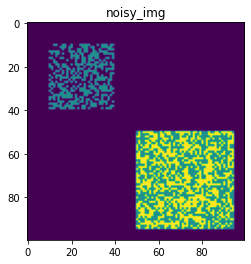

In [67]:
plt.imshow(noisy_img)
plt.title("original")
plt.show()

In [51]:
thresholded_img = img_processor.apply_otsus_algorithm(noisy_img)



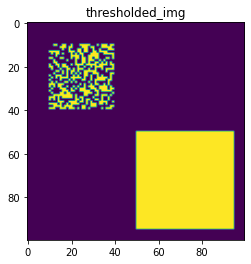

In [65]:
plt.imshow(thresholded_img)
plt.title("thresholded_img")
plt.show()

### part2     

In [53]:
import numpy as np
import cv2

In [54]:
class RegionGrow:
    def __init__(self, img, connectivity=4, thresh_diff=1):
        self.img = img
        self.connectivity = connectivity
        self.thresh_diff = thresh_diff
        self.visited = np.zeros_like(img)
        self.region = np.zeros_like(img)
        self.region_index = 1

    def grow(self, seed):
        # Get the seed point value and add it to the region
        seed_value = self.img[seed]
        self.region[seed] = self.region_index

        # Initialize the queue with the seed point
        queue = [seed]

        # Continue until the queue is empty
        while len(queue) > 0:
            # Pop the next point from the queue
            current_point = queue.pop(0)

            # Iterate over the neighbors of the current point
            for neighbor in np.ndindex(*[3] * self.img.ndim):
                neighbor_point = tuple(current_point[i] + neighbor[i] - 1 for i in range(self.img.ndim))
                if not self.is_valid_point(neighbor_point):
                    continue
                if self.visited[neighbor_point]:
                    continue

                # Compute the absolute difference between the neighbor value and the seed value
                neighbor_value = self.img[neighbor_point]
                diff = abs(neighbor_value - seed_value)

                # If the difference is less than the threshold, add the point to the region
                if diff <= self.thresh_diff:
                    self.region[neighbor_point] = self.region_index
                    self.visited[neighbor_point] = True
                    queue.append(neighbor_point)

        # Increment the region index for the next region
        self.region_index += 1

    def is_valid_point(self, point):
        for i in range(self.img.ndim):
            if point[i] < 0 or point[i] >= self.img.shape[i]:
                return False
        return True


In [55]:
# Create an image with 2 objects and a background
img = np.zeros((100, 100), dtype=np.uint8)
img[10:40, 10:40] = 1
img[50:95, 50:95] = 2


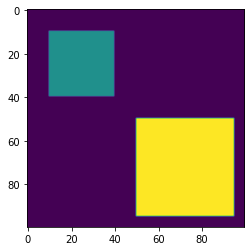

In [56]:
plt.imshow(img)

In [57]:
# Add Gaussian noise to the image
noise = np.random.normal(0, 0.4, (100, 100))
img_noise = img.astype(np.float32) + noise
img_noise = np.clip(img_noise, 0, 2).astype(np.uint8)

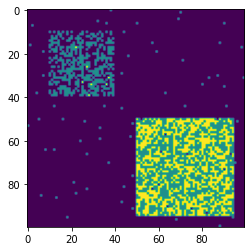

In [58]:
plt.imshow(img_noise)

In [59]:
# Apply Otsu's algorithm
_, thresh = cv2.threshold(img_noise, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


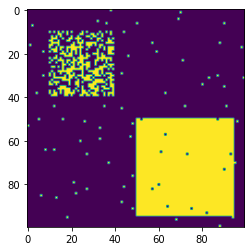

In [60]:
plt.imshow(thresh)

In [61]:
# Create a RegionGrow object and use it to segment the image
rg = RegionGrow(thresh, connectivity=8, thresh_diff=0.1)
for seed in [(20, 20), (70, 70)]:
    if not rg.visited[seed]:
        rg.grow(seed)

C:\Users\Dell\AppData\Local\Temp/ipykernel_2336/1397749217.py:33: RuntimeWarning: overflow encountered in scalar subtract
  diff = abs(neighbor_value - seed_value)


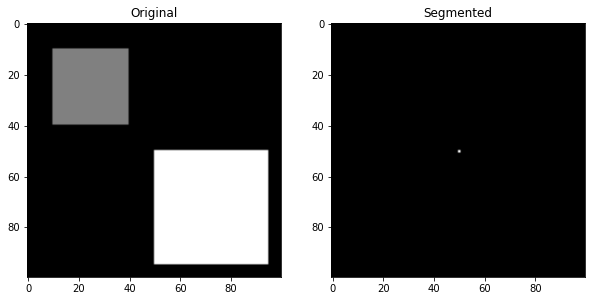

In [62]:

# Display the results
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Original')
axs[1].imshow(seg_img, cmap='gray')
axs[1].set_title('Segmented')
plt.show()